<a href="https://colab.research.google.com/github/klei22/nanoGPT/blob/csv_process_flow/NanoGPT_Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div class="mrkdown-google-sans">

# **GPU Quickstart**

</div>

<div class="mrkdown-google-sans">

### **Install NanoGPT GPU Dependencies**

</div>


In [1]:
%cd
!git clone https://github.com/ReaLLMASIC/nanoGPT.git nanoGPT_gpu
%cd nanoGPT_gpu

# check branch info
!echo "Cloned repository"
!git branch

!ls

!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install numpy transformers datasets tiktoken wandb tqdm tensorboard


/root
Cloning into 'nanoGPT_gpu'...
remote: Enumerating objects: 1081, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 1081 (delta 211), reused 269 (delta 187), pack-reused 710
Receiving objects: 100% (1081/1081), 2.39 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (599/599), done.
/root/nanoGPT_gpu
Cloned repository
* master
assets			  HW			       sample.py
bench.py		  install_llama_cpp_python.sh  scaling_laws.ipynb
config			  LICENSE		       start_tensorboard.sh
Contributing_Features.md  model.py		       train.py
data			  modules		       transformer_sizing.ipynb
data_augmentation	  README.md
explorations		  requirements_cpu.txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━

<div class="mrkdown-google-sans">

### **Run GPU Training**

</div>


In [4]:
!python3 data/shakespeare_char/prepare.py
!python3 train.py --device="cuda" --dtype="float16" --max_iters=3500 --out_dir="out-shakespeare"

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens
2023-12-02 18:28:45.646760: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 18:28:45.646824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 18:28:45.646866: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 18:28:45.654840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in perform

<div class="mrkdown-google-sans">

### **Run GPU Inference**

</div>


In [5]:
!python3 sample.py --out_dir="out-shakespeare" --device="cuda" --dtype="float16" --num_samples=1

{'block_size': 256, 'n_layer': 6, 'n_head': 6, 'n_embd': 384, 'dropout': 0.0, 'bias': False, 'use_post_ln': False, 'use_rmsnorm': True, 'use_rotary_embeddings': True, 'rope_variant': 'rope', 'shortrope_length': 16, 'use_abs_pos_embeddings': False, 'use_softmax_variant': False, 'softmax_variant': 'softermax', 'use_softermax_xmax': False, 'strongermax_strength': 2, 'vocab_size': 65}
Use GELU
Use GELU
Use GELU
Use GELU
Use GELU
Use GELU
number of parameters: 10.65M
Loading meta from data/shakespeare_char/meta.pkl...


KING RICHARD II:
Sweet not the disguide you will grave thee,
Take the baby put on his bark that are away,
And none a wizard heavens, to the heart and now
Which in tears and that Hercures the deep on him:
And all tell me apparellish won him to us;
For they yet unto the root to go with thy world,
So let Warwick, their state that said his shame
A poor own for the king to the fire;
And he must not in the times dear?

KING HENRY VI:
Hark! but, what a cause of the discover and tea

<div class="mrkdown-google-sans">

# **CSV Data Training**

</div>

<div class="mrkdown-google-sans">

## **Prepare sample data**

</div>

In [21]:
%cd
%cd nanoGPT_gpu
%cd data/csv_data
%ls
!bash example_sine_and_noise.sh
!tail processed_sine_data.csv
!python3 prepare.py -i processed_sine_data.csv

/root
/root/nanoGPT_gpu
/root/nanoGPT_gpu/data/csv_data
app.py                     main.sh                   sine_noise_sn_shuffled.csv
clean.sh                   meta.pkl                  sine_time_data_unshuffled_recombined.csv
combine_csvs.py            prepare.py                templates/
csv_data.txt               process_csv.py            time_sine_data.csv
csv_data_unshuffled.csv    processed_sine_data.csv   train.bin
csv_forecast.txt           README.md                 unprocess.py
csv_time.txt               results/                  val.bin
data_sine_data.csv         sine_data_unshuffled.csv
example_sine_and_noise.sh  sine_noise_generator.py
+ python3 sine_noise_generator.py --noise_level 0.3 --filename sine_data.csv --scientific --precision 2 --modulo 10000 --points 1000 --split
Time data saved to time_sine_data.csv
Signal data saved to data_sine_data.csv
+ set +x

Preview: Generated Times
0.00e+00
1.00e+00
2.00e+00
3.00e+00
4.00e+00
5.00e+00
6.00e+00
7.00e+00
8.00e+00
9.00e+

In [7]:
%cd
%cd nanoGPT_gpu
!python3 train.py --dataset="csv_data" --dtype="float16" --device="cuda" --max_iters=2100

/root
/root/nanoGPT_gpu
2023-12-02 18:34:26.860132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 18:34:26.860207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 18:34:26.860254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 18:34:26.868248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 18:34:2

In [8]:
%cd
%cd nanoGPT_gpu
!python3 sample.py --out_dir="out" --dtype="float16" --device="cuda" | tail -n 12 | head -n 10 | tee csv_forecast.txt

/root
/root/nanoGPT_gpu
8.09e+02a5.36e-01b1.74e-01c7.11e-01
8.11e+02c5.55e-01b-1.31e-01a5.88e-01
8.10e+01a6.85e-01c5.37e-01b-1.97e-01
8.13e+02b-4.77e-01c2.73e-01a7.29e-01
8.15e+02a8.09e-01b-9.37e-01c6.68e-01
8.15e+02a8.09e-01b-1.52e-01c6.05e-01
8.19e+02c9.73e-01b-1.50e-01a9.05e-01
8.20e+02c9.53e-01a9.30e-01b-1.25e-01
8.22e+02b1.02e-01c7.78e-01a9.30e-01
8.20e+02a9.51e-01b-5.56e-01c8.71e-01


In [26]:
%cd
%cd nanoGPT_gpu
# TODO: directly unprocess forecast that has the time and the data
!cat csv_forecast.txt | sed 's/^........//g' > csv_data.txt
!cat csv_forecast.txt | sed 's/\(^........\).*/\1/g' > csv_time.txt
!cat csv_data.txt
!cat csv_time.txt


/root
/root/nanoGPT_gpu
a5.36e-01b1.74e-01c7.11e-01
c5.55e-01b-1.31e-01a5.88e-01
a6.85e-01c5.37e-01b-1.97e-01
b-4.77e-01c2.73e-01a7.29e-01
a8.09e-01b-9.37e-01c6.68e-01
a8.09e-01b-1.52e-01c6.05e-01
c9.73e-01b-1.50e-01a9.05e-01
c9.53e-01a9.30e-01b-1.25e-01
b1.02e-01c7.78e-01a9.30e-01
a9.51e-01b-5.56e-01c8.71e-01
8.09e+02
8.11e+02
8.10e+01
8.13e+02
8.15e+02
8.15e+02
8.19e+02
8.20e+02
8.22e+02
8.20e+02


In [34]:
%cd
%cd nanoGPT_gpu
!cp csv_time.txt ./data/csv_data
!cp csv_data.txt ./data/csv_data
%cd ./data/csv_data
!ls
!python3 unprocess.py -i csv_data.txt -o csv_data_unshuffled.csv -l abc -c
!cat csv_data_unshuffled.csv
!python3 combine_csvs.py -l csv_time.txt -r csv_data_unshuffled.csv -o csv_extended_forecast.csv -d,
!cat csv_extended_forecast.csv
!python3 combine_csvs.py -l time_sine_data.csv -r data_sine_data.csv -o original.csv -d,
!cat original.csv csv_extended_forecast.csv > original_plus_forecast.csv

/root
/root/nanoGPT_gpu
/root/nanoGPT_gpu/data/csv_data
app.py			   example_sine_and_noise.sh  sine_noise_generator.py
clean.sh		   main.sh		      sine_noise_sn_shuffled.csv
combine_csvs.py		   meta.pkl		      sine_time_data_unshuffled_recombined.csv
csv_data.txt		   prepare.py		      templates
csv_data_unshuffled.csv    process_csv.py	      time_sine_data.csv
csv_extended_forecast.csv  processed_sine_data.csv    train.bin
csv_forecast.txt	   README.md		      unprocess.py
csv_time.txt		   results		      val.bin
data_sine_data.csv	   sine_data_unshuffled.csv
5.36e-01,1.74e-01,7.11e-01
5.88e-01,-1.31e-01,5.55e-01
6.85e-01,-1.97e-01,5.37e-01
7.29e-01,-4.77e-01,2.73e-01
8.09e-01,-9.37e-01,6.68e-01
8.09e-01,-1.52e-01,6.05e-01
9.05e-01,-1.50e-01,9.73e-01
9.30e-01,-1.25e-01,9.53e-01
9.30e-01,1.02e-01,7.78e-01
9.51e-01,-5.56e-01,8.71e-01
8.09e+02,5.36e-01,1.74e-01,7.11e-01
8.11e+02,5.88e-01,-1.31e-01,5.55e-01
8.10e+01,6.85e-01,-1.97e-01,5.37e-01
8.13e+02,7.29e-01,-4.77e-01,2.73e-01
8.15e+02,8.

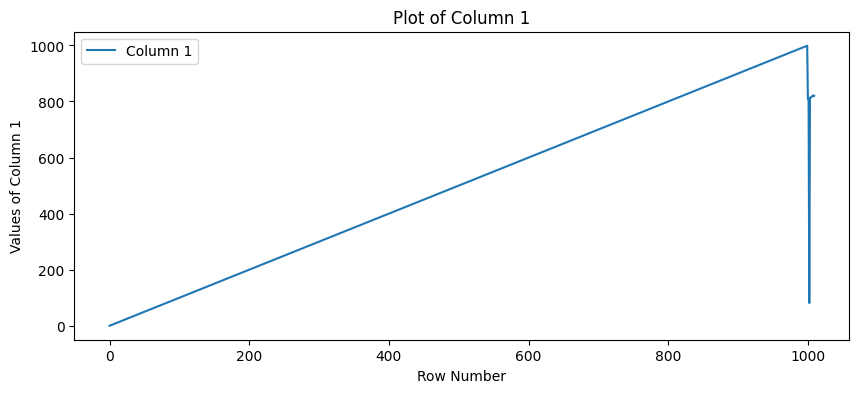

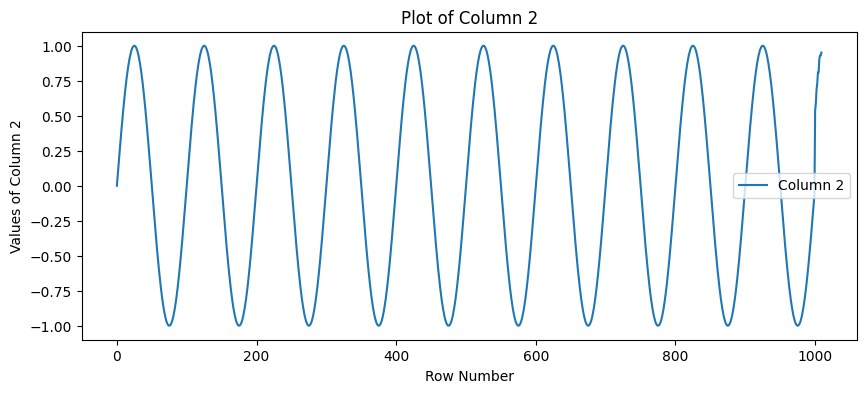

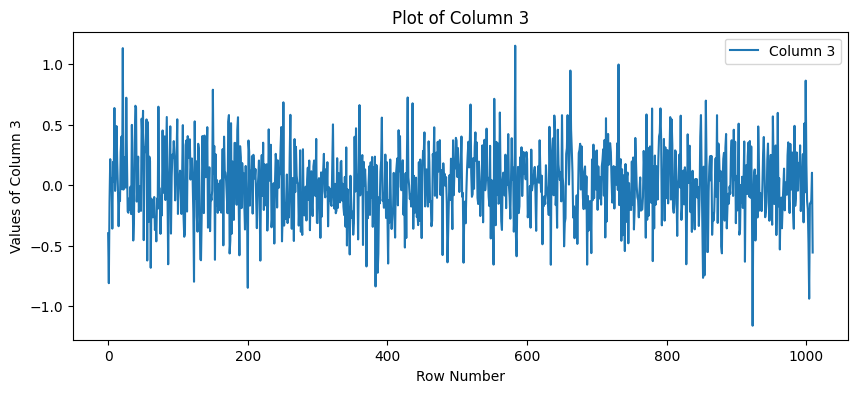

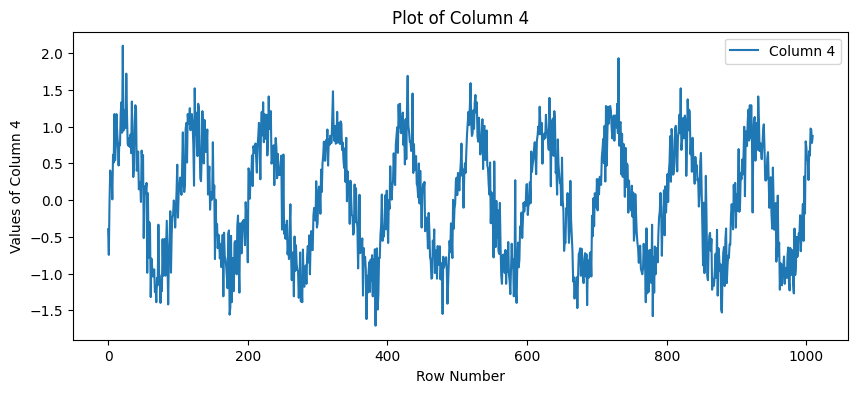

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file
df = pd.read_csv("original_plus_forecast.csv", header=None)
# Number of rows for the x-axis
num_rows = df.shape[0]

# Create a separate plot for each column
for i in range(df.shape[1]):
    plt.figure(figsize=(10, 4))
    plt.plot(range(num_rows), df[i], label=f'Column {i+1}')
    plt.xlabel('Row Number')
    plt.ylabel(f'Values of Column {i+1}')
    plt.title(f'Plot of Column {i+1}')
    plt.legend()
    plt.show()


